In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()


In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 35s 35ms/step - loss: 3.4469 - accuracy: 0.2933 - val_loss: 0.5020 - val_accuracy: 0.8735
Epoch 2/15
981/981 [==============================] - 38s 39ms/step - loss: 0.7364 - accuracy: 0.7897 - val_loss: 0.1491 - val_accuracy: 0.9628
Epoch 3/15
981/981 [==============================] - 35s 36ms/step - loss: 0.3879 - accuracy: 0.8909 - val_loss: 0.1459 - val_accuracy: 0.9626
Epoch 4/15
981/981 [==============================] - 36s 37ms/step - loss: 0.3162 - accuracy: 0.9118 - val_loss: 0.1023 - val_accuracy: 0.9719
Epoch 5/15
981/981 [==============================] - 37s 38ms/step - loss: 0.2642 - accuracy: 0.9259 - val_loss: 0.1057 - val_accuracy: 0.9725
Epoch 6/15
981/981 [==============================] - 37s 38ms/step - loss: 0.2310 - accuracy: 0.9377 - val_loss: 0.0662 - val_accuracy: 0.9819
Epoch 7/15
981/981 [==============================] - 37s 37ms/step - loss: 0.2054 - accuracy: 0.9448 - val_loss: 0.0666 - val_accuracy:

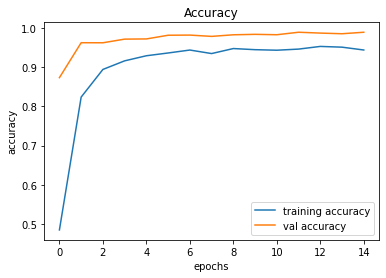

In [12]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

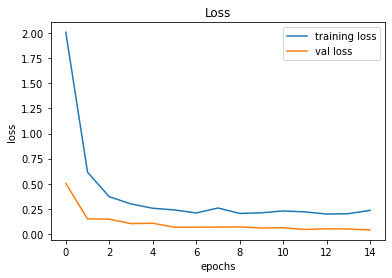

In [13]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import accuracy_score


In [15]:
y_test = pd.read_csv('Test.csv')

In [16]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [21]:
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9666666666666667


In [23]:
model.save('traffic_classifier.h5')